# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Rofiif Taqiyyuddin Nabiil]
- **Email:** [muhammad.rofif369@gmail.com]
- **ID Dicoding:** [rofifdk]

## Menentukan Pertanyaan Bisnis

- Berapa Rata-rata Jumlah Penyewaan Sepeda per Hari Kerja dalam Seminggu?
- Bagaimana Penggunaan Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile

## Data Wrangling

### Gathering Data

**Menggunakan df_days untuk keseluruhan data harian karena day_df untuk satu hari tertentu dan .**

In [10]:
# ID file dari Google Drive
file_id = '1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ'
destination = 'bike_sharing_dataset.zip'

# URL Google Drive yang dapat diunduh
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Unduh file menggunakan gdown
gdown.download(download_url, destination, quiet=False)

# Ekstrak file zip
with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data')

print("File berhasil diekstrak ke /content/sample_data")

Downloading...
From: https://drive.google.com/uc?export=download&id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/bike_sharing_dataset.zip
100%|██████████| 280k/280k [00:00<00:00, 5.32MB/s]

File berhasil diekstrak ke /content/sample_data


In [11]:
df_day = pd.read_csv("/content/sample_data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `day`

- Memeriksa tipe data data dari tiap kolom yang terdapat dalam df_day

In [12]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Menampilkan informasi terkait jumlah missing values yang terdapat dalam df_day

In [13]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Menampilkan jumlah duplikasi yang ada pada df_day

In [14]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


- Menampilkan ringkasan parameter statistik (mean, median, dll.) yang terdapat dalam df_day

In [15]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


KESIMPULAN : TIDAK TERDAPAT DATA MISSING VALUE, DUPLICATE, OUTLIER, DAN TIDAK ADA YANG NULL

### Cleaning Data

- Mendapatkan daftar kolom untuk memeriksa atau memanipulasi kolom yang terdapat pada df_day

In [16]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- Menampilkan informasi terkait jumlah missing values yang terdapat dalam df_day

In [17]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Untuk menampilkan tipe data dari setiap kolom yang terdapat di df_day

In [18]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Exploratory Data Analysis (EDA)

### Explore `df_day`

- Melihat rangkuman parameter statistik dari data df_day menggunakan method describe()

In [19]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- Mengubah tipe data menjadi tipe datetime

In [20]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

- Menampilkan lima baris pertama dari kolom `df day`

In [21]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa Rata-rata Jumlah Penyewaan Sepeda pada Hari Kerja dalam Seminggu?

- Mengambil sampel acak lima baris dari df days

In [22]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
350,351,2011-12-17,4,0,12,0,6,0,2,0.258333,0.249371,0.560833,0.243167,275,2464,2739
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
188,189,2011-07-08,3,0,7,0,5,1,2,0.709167,0.670483,0.757917,0.225129,692,3348,4040
515,516,2012-05-30,2,1,5,0,3,1,2,0.656667,0.611129,0.670000,0.134329,745,6110,6855
379,380,2012-01-15,1,1,1,0,0,0,1,0.166667,0.161625,0.419167,0.251258,284,2027,2311


- Menampilkan lima baris

In [23]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Menampilkan rata-rata jumlah penggunaan sepeda pada hari kerja dalam seminggu

In [24]:
df_day.groupby('weekday')['cnt'].mean().reset_index()

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,4,4667.259615
5,5,4690.288462
6,6,4550.542857


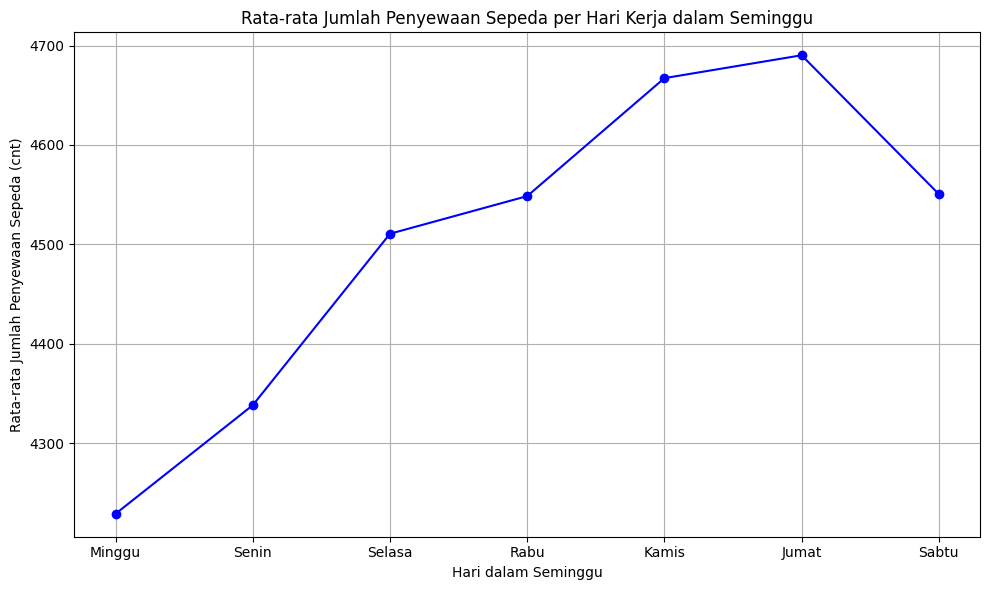

In [25]:
avg_weekday = df_day.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_weekday['weekday'], avg_weekday['cnt'], linestyle='-', marker='o', color='b')
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Hari Kerja dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.grid(True)
plt.tight_layout()
plt.xticks(avg_weekday['weekday'], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

 Berdasarkan plot grafik di atas, dapat disimpulkan bahwa hari Kamis dan Jumat merupakan hari-hari dengan rata-rata penyewaan sepeda tertinggi dalam seminggu, sedangkan Minggu merupakan hari dengan rata-rata penyewaan sepeda terendah. Hal ini menunjukkan tren yang dapat digunakan untuk mengatur strategi pemasaran dan penawaran layanan rental sepeda lebih efektif, seperti memberikan promosi khusus atau paket-paket yang menarik pada hari-hari dengan jumlah penyewaan sepeda tinggi

### Pertanyaan 2: Bagaimana Penggunaan Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur?

In [26]:
df_day.groupby('holiday')['cnt'].mean().reset_index().sort_values("cnt")

,holiday,cnt
1,1,3735.000000
0,0,4527.104225


<ipython-input-27-ec2404fed45e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=avg_holiday, palette='Set1')


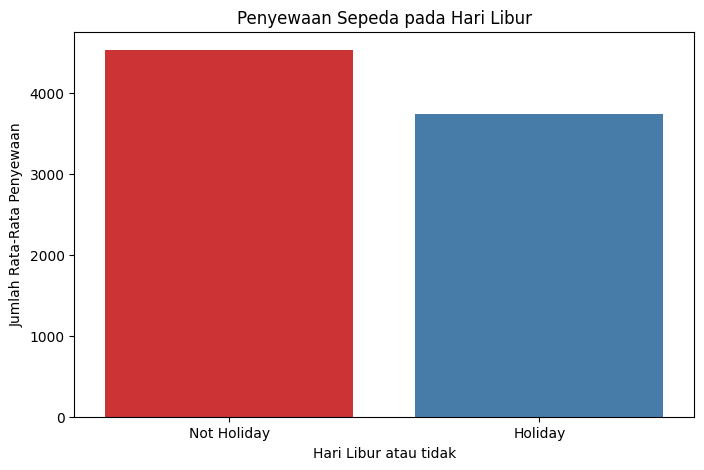

In [27]:
avg_holiday = df_day.groupby('holiday')['cnt'].mean().reset_index().sort_values("cnt")
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=avg_holiday, palette='Set1')

plt.title('Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur atau tidak')
plt.ylabel('Jumlah Rata-Rata Penyewaan')
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])

plt.show()

Berdasarkan plot grafik di atas, dapat disimpulkan bahwa kondisi hari kerja (Weekday) cenderung memiliki jumlah sewa sepeda yang lebih tinggi dibandingkan hari libur. Dari insight ini, rental sepeda dapat meningkatkan omset dengan menyediakan fasilitas tambahan yang mendukung pelanggan yang sedang bekerja, misalnya dengan menyediakan paket penyewaan yang termasuk sarapan. Hal ini diharapkan dapat membuat pelanggan merasa lebih terfasilitasi, meningkatkan kepuasan, dan mungkin mempertimbangkan untuk berlangganan layanan rental secara rutin.

## Conclusion

- Conclution pertanyaan 1 : Kesimpulan : Penyewaan sepeda dalam seminggu lebih tinggi pada hari Kamis dan Jumat, sedangkan penyewaan terendah pada hari minggu. Berdasarkan data ini maka pemilik bisa untuk mengatur strategi pemasaran dan penawaran layanan rental sepeda lebih efektif, seperti memberikan promosi khusus atau paket-paket yang menarik pada hari-hari dengan jumlah penyewaan sepeda tinggi
- Conclution pertanyaan 2 : Kesimpulan : Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Berdasarkan data maka pemilik bisa untuk meningkatkan omset seperti menyediakan fasilitas tambahan seperti paket sewa dengan sarapan untuk mendorong pelanggan untuk berlangganan secara teratur.

In [28]:
df_day.to_csv("all_data.csv", index=False)